In [6]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
data = pd.read_csv("Cardiovascular_Disease_Dataset.csv")

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


DATA CLEANING

In [9]:
data[(data["slope"] < 1) | (data["slope"] > 3)]

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
8,188225,62,1,0,121,357,0,1,138,0,2.8,0,0,0
12,223295,27,1,0,129,135,0,1,192,1,1.0,0,0,0
19,260870,35,1,0,127,269,0,0,87,1,3.8,0,1,0
25,390931,71,1,1,101,352,0,1,183,0,3.6,0,0,0
26,390988,46,1,0,198,253,0,0,199,1,2.1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,9736370,65,1,0,125,346,0,1,93,1,3.9,0,0,0
988,9870657,74,1,0,136,279,0,1,122,0,1.2,0,0,0
991,9896438,24,1,0,170,354,0,0,90,1,1.5,0,0,0
994,9937998,62,1,1,125,342,0,0,128,1,2.1,0,0,0


In [10]:
data["slope"] = data["slope"].replace(0, np.nan)

data["slope"] = data["slope"].fillna(data["slope"].median())

In [11]:
data["slope"].isna().sum()

0

In [12]:
data["serumcholestrol"] = data["serumcholestrol"].replace(0, np.nan)

data["serumcholestrol"] = data["serumcholestrol"].interpolate(method="linear")


data["serumcholestrol"] = data["serumcholestrol"].fillna(data["serumcholestrol"].median())

In [13]:
data["serumcholestrol"].isna().sum()

0

**DATA ANALYSIS** 

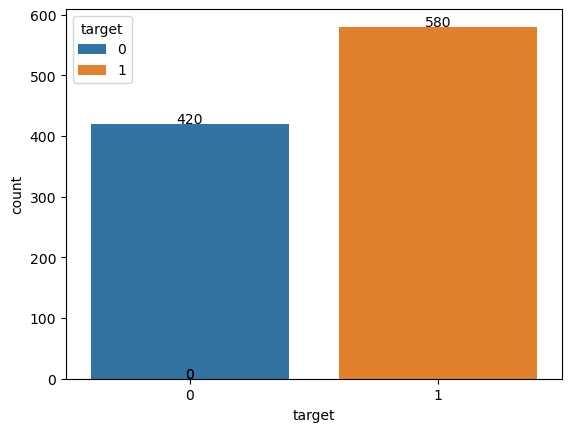

In [14]:
# distribution of target value
ax = sns.countplot(data, x = "target", hue = "target", stat = "count")

for value in ax.patches:
    height = value.get_height()
    ax.text(value.get_x() + value.get_width() / 2 , height + 0.5, '{:1.0f}'.format(height), ha = "center")
plt.show()

In [16]:
data = data.drop(columns=["patientid"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1000 non-null   int64  
 1   gender             1000 non-null   int64  
 2   chestpain          1000 non-null   int64  
 3   restingBP          1000 non-null   int64  
 4   serumcholestrol    1000 non-null   float64
 5   fastingbloodsugar  1000 non-null   int64  
 6   restingrelectro    1000 non-null   int64  
 7   maxheartrate       1000 non-null   int64  
 8   exerciseangia      1000 non-null   int64  
 9   oldpeak            1000 non-null   float64
 10  slope              1000 non-null   float64
 11  noofmajorvessels   1000 non-null   int64  
 12  target             1000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 101.7 KB


In [20]:
from sklearn.preprocessing import StandardScaler

numeric_columns = ["age", "restingBP", "serumcholestrol", "maxheartrate", "oldpeak", "noofmajorvessels"]
binary_columns = ["gender", "fastingbloodsugar", "exerciseangia"]
category_columns = ["chestpain", "restingrelectro", "slope"]

scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

data = pd.get_dummies(data, columns=category_columns, drop_first=True)